In [1]:
from sklearn.datasets import load_iris
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

# Convert to a DataFrame for better visualization
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = iris.target
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


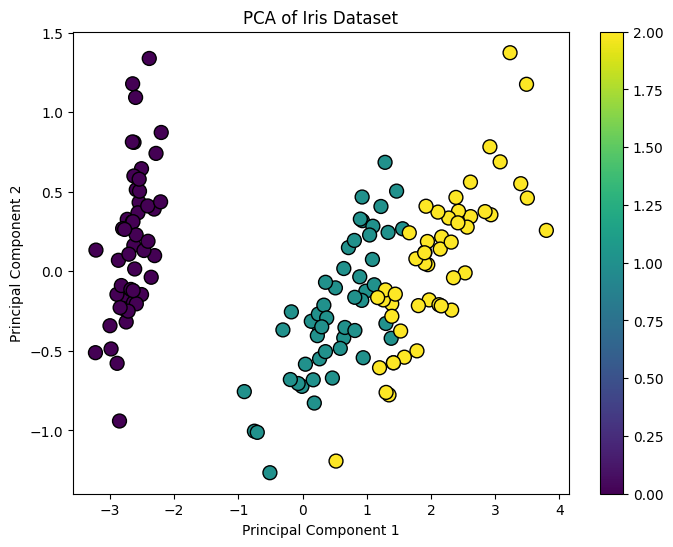

In [2]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.colorbar()
plt.show()


In [7]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean

# Calculate cosine similarity
cos_sim_matrix = cosine_similarity(X_pca)

# Calculate Euclidean distances
euclidean_distances = [[euclidean(X_pca[i], X_pca[j]) for j in range(len(X_pca))] for i in range(len(X_pca))]

# Convert to DataFrames for easier interpretation
species_labels = [iris.target_names[i] for i in iris.target]  # Create a list of species labels for each sample
cos_sim_df = pd.DataFrame(cos_sim_matrix, columns=species_labels, index=species_labels)
euclidean_df = pd.DataFrame(euclidean_distances, columns=species_labels, index=species_labels)


cos_sim_df.head(150), euclidean_df.head(150)


(             setosa    setosa    setosa    setosa    setosa    setosa  \
 setosa     1.000000  0.983200  0.985826  0.972778  1.000000  0.980890   
 setosa     0.983200  1.000000  0.999888  0.998735  0.983065  0.928897   
 setosa     0.985826  0.999888  1.000000  0.997869  0.985701  0.934344   
 setosa     0.972778  0.998735  0.997869  1.000000  0.972606  0.909100   
 setosa     1.000000  0.983065  0.985701  0.972606  1.000000  0.981034   
 ...             ...       ...       ...       ...       ...       ...   
 virginica -0.977061 -0.999518 -0.998941 -0.999814 -0.976903 -0.916955   
 virginica -0.992501 -0.953514 -0.957924 -0.937155 -0.992591 -0.997317   
 virginica -0.986728 -0.999791 -0.999985 -0.997498 -0.986607 -0.936277   
 virginica -0.983895 -0.999993 -0.999938 -0.998534 -0.983762 -0.930314   
 virginica -0.996627 -0.964905 -0.968734 -0.950481 -0.996688 -0.993548   
 
              setosa    setosa    setosa    setosa  ...  virginica  virginica  \
 setosa     0.988749  0.99841